In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import math as mh
import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.10.4


In [2]:
sx=10
sy=10
rd = 0.5      #deepth of texture
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 50
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                     )
           ]

In [4]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 , 0), 
                     size=mp.Vector3(0, 0.5*sy-2*dpml)
                    )
          ]

     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


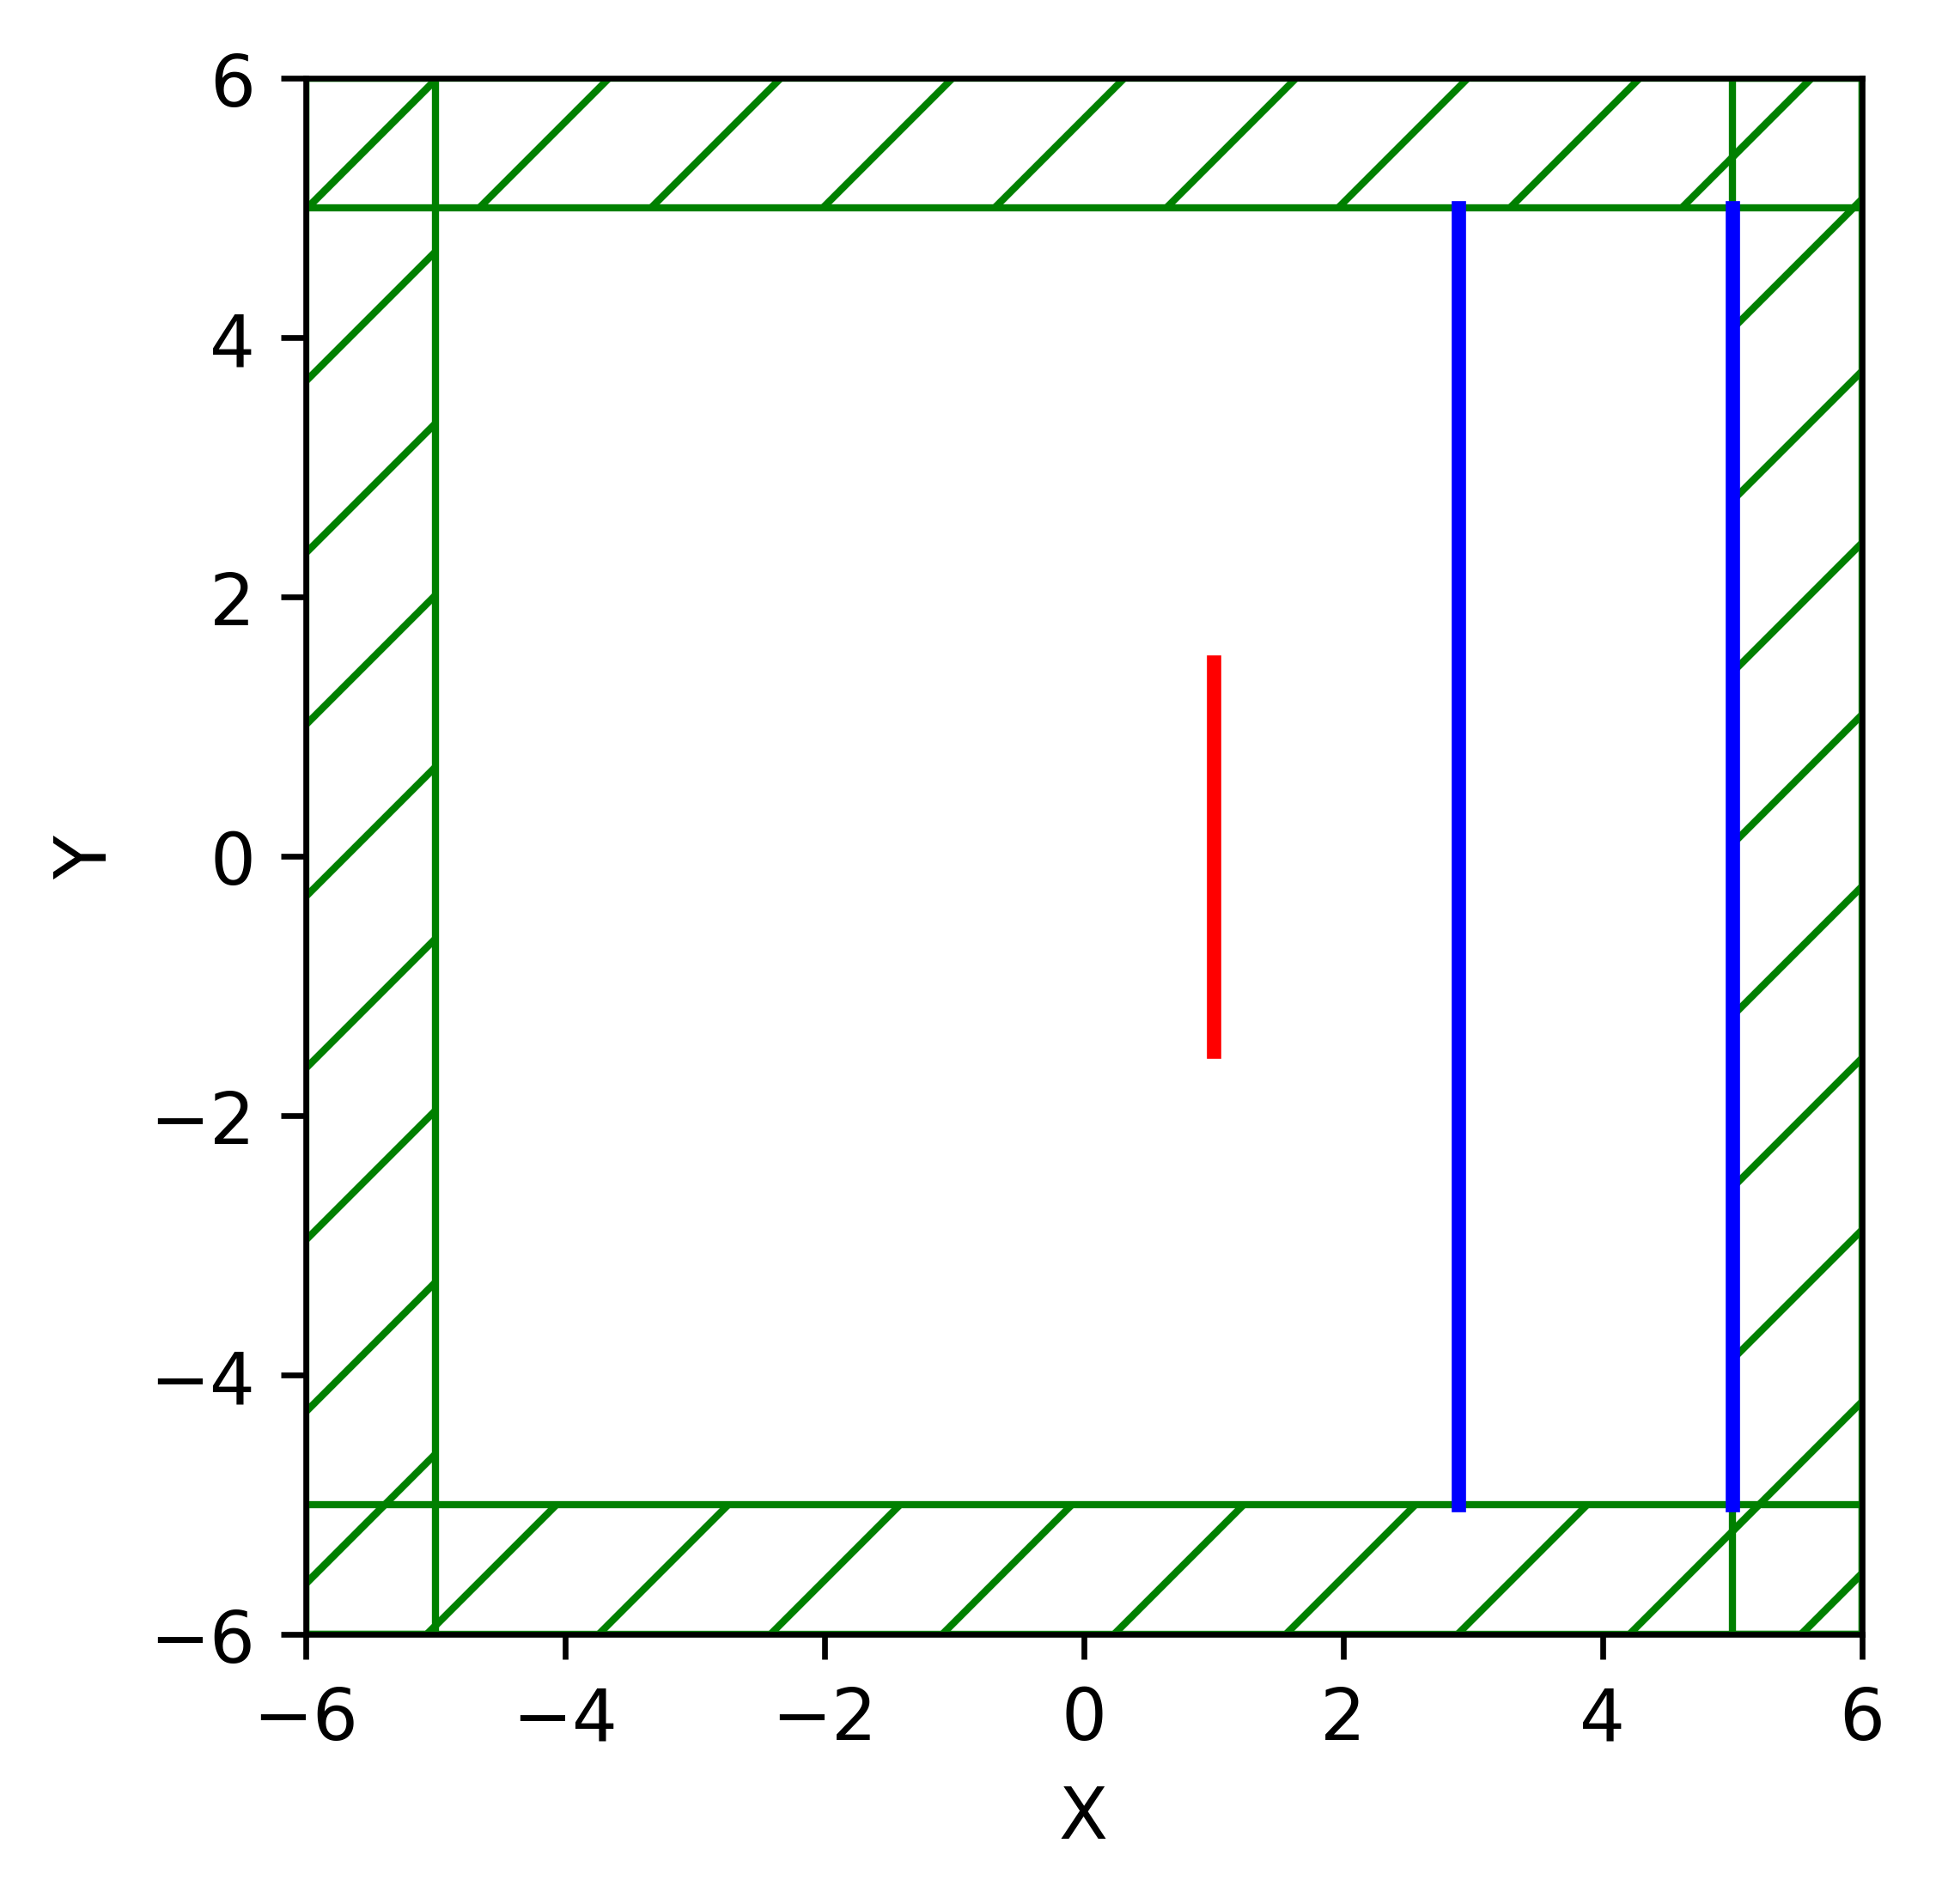

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                          )

refl_1 = sim.add_flux(
                      fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                      )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                      )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [6]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000535011 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.786744 s
-----------
creating output file "./eps-000000.00.h5"...
on time step 1116 (time=11.16), 0.0035861 s/step
on time step 2179 (time=21.79), 0.00376437 s/step
on time step 3255 (time=32.55), 0.00372106 s/step
on time step 4158 (time=41.58), 0.00443283 s/step
field decay(t = 50.01): 0.39441514008126954 / 0.39441514008126954 = 1.0
on time step 5012 (time=50.12), 0.00468481 s/step
on time step 6091 (time=60.91), 0.00370983 s/step
on time step 7201 (time=72.01), 0.00360363 s/step
on time step 7896 (time=78.96), 0.00575765 s/step
on time step 8411 (time=84.11), 0.00779454 s/step
on time step 9230 (time=92.3), 0.00488611 s/step
on time step 9756 (t

In [7]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
#no_ARC_ttran_flux + no_ARC_rrefl_flux

-----------
Initializing structure...
time for choose_chunkdivision = 0.000991106 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.15,4.675,0)
          size (0.5,0.3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.15,4.05,0)
          size (0.5,0.3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.15,3.425,0)
          size (0.5,0.3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.15,2

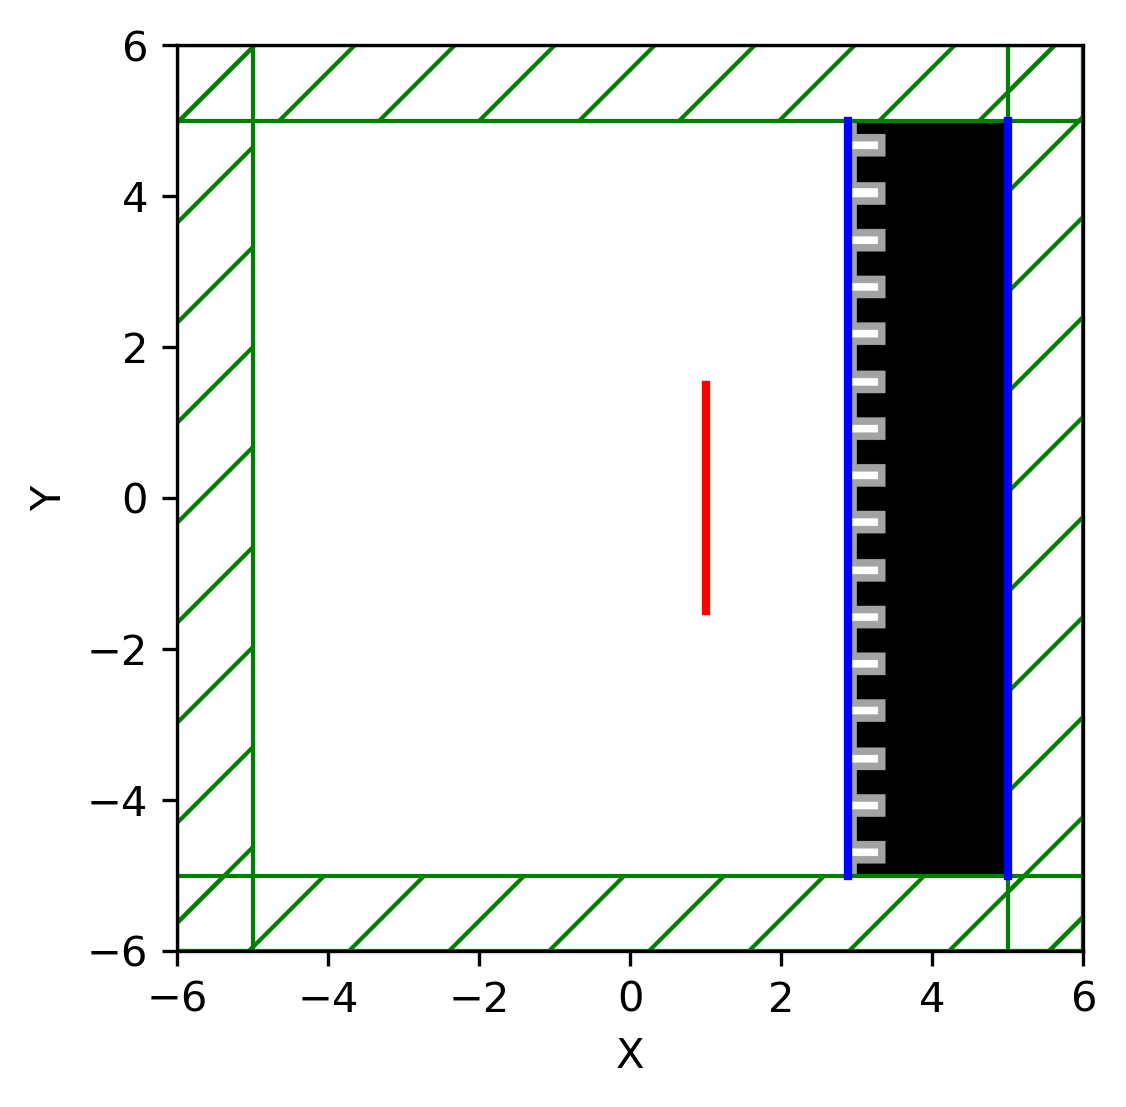

In [8]:
sim.reset_meep()

import math as mh


# Design texture
size_x = 0.4
size_y = 0.3
N = 15
D = (sy)/(N+1)


geometry = [mp.Block(
                    size = mp.Vector3(T_Si, sy, mp.inf), 
                    center = mp.Vector3(0.5*sx-0.5*(T_Si), 0),
                    material = cSi
                     ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4
                     )
           ]

for i in range(N, -1, -1):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(size_x+T_Arc, size_y, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc)+0.5*(size_x+T_Arc),
                                      -0.5*sy+size_y+D*i), 
                            material = Si3N4,
                            )
                            )
        
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(size_x, size_y-2*T_Arc, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc)+0.5*(size_x), -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            )
                            )
        
geometry.append( 
            mp.Block(
                    size = mp.Vector3(2*T_Arc, sy, mp.inf),
                    center = (0.5*sx-(T_Si+T_Arc)-T_Arc, 0), 
                      material = mp.Medium(epsilon=eps_air),
                     )
                ) 
'''
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(T_Arc, size_y, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc-size_x)-0.5*T_Arc, (-0.5*sy+size_y+D*i)), 
                            material = Si3N4,
                            )
                            )

#for i in np.arange(N+.5, -.5, -.5) and j in np.arange(2*N+1, -1 , -1):
for i, j in zip(np.arange(N+.5, -.5, -.5), np.arange(2*N+1, -1 , -1)):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(size_x, T_Arc, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc-size_x)-0.5*size_x, (-0.5*sy+0.5*size_y+D*i)+((-1)**j)*0.49999*T_Arc), 
                            material = Si3N4,
                            )
                            )
'''        
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                    )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                      )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=300)
sim.plot2D()
plt.show()


In [9]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000.00.h5"...


/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1343: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1347: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 460 (time=4.6), 0.00870768 s/step
on time step 844 (time=8.44), 0.0104331 s/step
on time step 1200 (time=12), 0.0112485 s/step
on time step 1518 (time=15.18), 0.0125946 s/step
on time step 1968 (time=19.68), 0.00890226 s/step
field decay(t = 20.01): 0.0011916973442264347 / 0.0011916973442264347 = 1.0
on time step 2396 (time=23.96), 0.00936096 s/step
on time step 2848 (time=28.48), 0.00885371 s/step
on time step 3257 (time=32.57), 0.0097915 s/step
on time step 3688 (time=36.88), 0.00929711 s/step
field decay(t = 40.02): 0.00021903584115581313 / 0.0011916973442264347 = 0.18380156859206198
on time step 4100 (time=41), 0.00971388 s/step
on time step 4586 (time=45.86), 0.00824428 s/step
on time step 4971 (time=49.71), 0.0104014 s/step
on time step 5212 (time=52.12), 0.0167119 s/step
on time step 5680 (time=56.8), 0.00855739 s/step
field decay(t = 60.03): 7.927008322113239e-06 / 0.0011916973442264347 = 0.006651863713985945
on time step 6012 (time=60.12), 0.0120529 s/step
on time

In [10]:
#no_ARC_refl_data

In [11]:
#no_ARC_refl_flux

In [12]:
#with_ARC_refl_flux

In [13]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('step_with_ARC.csv')

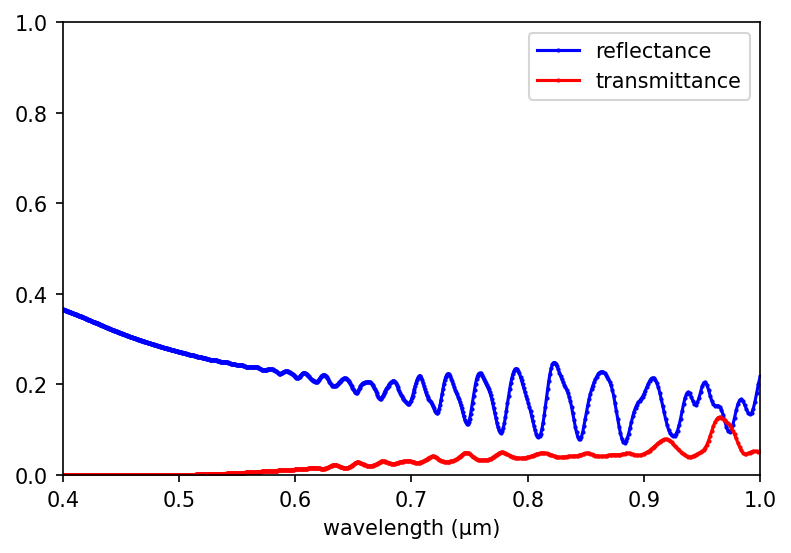

In [14]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption', markersize = 1)
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()